In [1]:
from collections import Counter
import pandas
import matplotlib.pyplot as plt
import sqlite3

In [2]:
conn = sqlite3.connect('words.db')
cur = conn.cursor()

## В 10000 по тысячам

In [3]:
q = pandas.read_sql_query(''' select *
        from main
        order by freq DESC
        limit 10000''', conn)

df = pandas.DataFrame(q, columns=['word','freq','type'])

In [4]:
def fill_types(i, cnt_types, amb_pos, amb_par, amb_lem, amb_pos_lem, norm):
    for t in cnt_types.keys():
        if t == 'неоднозначно по части речи':
            amb_pos[i] = cnt_types[t]
        elif t == 'неоднозначно по параметрам':
            amb_par[i] = cnt_types[t]
        elif t == 'неоднозначно по лемме':
            amb_lem[i] = cnt_types[t]
        elif t == 'неоднозначно по части речи и лемме':
            amb_pos_lem[i] = cnt_types[t]
        elif t == 'однозначно':
            norm[i] = cnt_types[t]

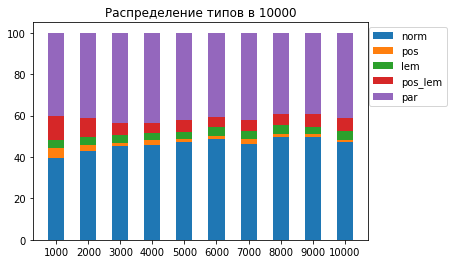

In [5]:
labels = ['1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000', '10000']
amb_pos, amb_par, amb_lem = [0 for i in range(10)], [0 for i in range(10)], [0 for i in range(10)]
amb_pos_lem, norm  = [0 for i in range(10)], [0 for i in range(10)]


for i in range(10):
    working_df = df[1000*i:1000*(i+1)+1]
    cnt_types = Counter(working_df['type'])
    fill_types(i, cnt_types, amb_pos, amb_par, amb_lem, amb_pos_lem, norm)
        
width = 0.5

fig, ax = plt.subplots()

totals = [i+j+k+p+o for i,j,k,p,o in zip(amb_pos, norm, amb_lem, amb_pos_lem, amb_par)]

amb_pos = [i / j * 100 for i,j in zip(amb_pos, totals)]
amb_par = [i / j * 100 for i,j in zip(amb_par, totals)]
amb_lem = [i / j * 100 for i,j in zip(amb_lem, totals)]
amb_pos_lem = [i / j * 100 for i,j in zip(amb_pos_lem, totals)]
norm = [i / j * 100 for i,j in zip(norm, totals)]

ax.bar(labels, norm, width, label='norm')
ax.bar(labels, amb_pos, width, bottom=norm, label='pos')
ax.bar(labels, amb_lem, width, bottom=[i+j for i,j in zip(amb_pos, norm)], label='lem')
ax.bar(labels, amb_pos_lem, width, 
       bottom=[i+j+k for i,j,k in zip(amb_pos, norm, amb_lem)], label='pos_lem')
ax.bar(labels, amb_par, width, 
       bottom=[i+j+k+p for i,j,k,p in zip(amb_pos, norm, amb_lem, amb_pos_lem)], label='par')


ax.set_title('Распределение типов в 10000')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

plt.show()

## В 1000 по сотням

In [6]:
q = pandas.read_sql_query(''' select *
        from main
        order by freq DESC
        limit 1000''', conn)

df = pandas.DataFrame(q, columns=['word','freq','type'])

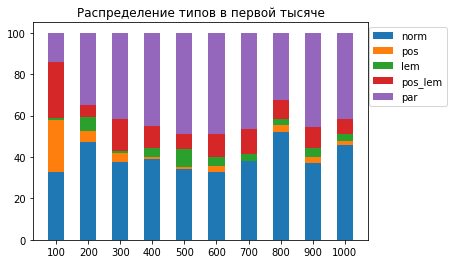

In [7]:
labels = ['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
amb_pos, amb_par, amb_lem = [0 for i in range(10)], [0 for i in range(10)], [0 for i in range(10)]
amb_pos_lem, norm = [0 for i in range(10)], [0 for i in range(10)]

for i in range(10):
    working_df = df[100*i:100*(i+1)+1]
    cnt_types = Counter(working_df['type'])
    fill_types(i, cnt_types, amb_pos, amb_par, amb_lem, amb_pos_lem, norm)
        
width = 0.5

fig, ax = plt.subplots()

totals = [i+j+k+p+o for i,j,k,p,o in zip(amb_pos, norm, amb_lem, amb_pos_lem, amb_par)]
amb_pos = [i / j * 100 for i,j in zip(amb_pos, totals)]
amb_par = [i / j * 100 for i,j in zip(amb_par, totals)]
amb_lem = [i / j * 100 for i,j in zip(amb_lem, totals)]
amb_pos_lem = [i / j * 100 for i,j in zip(amb_pos_lem, totals)]
norm = [i / j * 100 for i,j in zip(norm, totals)]


ax.bar(labels, norm, width, label='norm')
ax.bar(labels, amb_pos, width, bottom=norm, label='pos')
ax.bar(labels, amb_lem, width, bottom=[i+j for i,j in zip(amb_pos, norm)], label='lem')
ax.bar(labels, amb_pos_lem, width, 
       bottom=[i+j+k for i,j,k in zip(amb_pos, norm, amb_lem)], label='pos_lem')
ax.bar(labels, amb_par, width, 
       bottom=[i+j+k+p for i,j,k,p in zip(amb_pos, norm, amb_lem, amb_pos_lem)], label='par')


ax.set_title('Распределение типов в первой тысяче')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

plt.show()